Show the percentage of Proximus clients compared to the total population per arrondissement and province.

This figure is not used in the paper (confidential), but its lower limit may be used to justify using these data.

In [36]:
# import pandas as pd
import numpy as np
import pandas as pd
import glob
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19model.data.mobility import * # contains all necessary functions
from covid19model.visualization.utils import moving_avg

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# Visualisation in geopandas
import geopandas as gp

shp_dir = "../../data/raw/GIS/shapefiles/BE/"

# Load different geographical aggregations
country = gp.read_file(shp_dir + "AD_6_Country.shp")
regions = gp.read_file(shp_dir + "AD_5_Region.shp")
provinces = gp.read_file(shp_dir + "AD_4_Province.shp")
arrondissements = gp.read_file(shp_dir + "AD_3_District.shp")
municipalities = gp.read_file(shp_dir + "AD_2_Municipality.shp")

# Add NIS-code to Arrondissement Brussel-Hoofdstad
provinces.loc[provinces['NISCode']=='NA', 'NISCode'] = '21000'

In [38]:
raw_df = pd.read_csv("../../data/raw/mobility/proximus/arrondissements/corona_report_proximus_district2district_20200210_20200210.csv", sep=';', decimal=',')
df = raw_df.groupby('mllp_district').first()[['imsisindistrict','habitants']].drop(index=-2)

df.imsisindistrict = df.imsisindistrict.astype('float')
df.habitants = df.habitants.astype('float')

df['percentage'] = df['imsisindistrict']/df['habitants']*100
df = df.reset_index().rename(columns={'mllp_district':'NISCode'})

arrondissements.NISCode = arrondissements.NISCode.astype('int64')
arrondissements = arrondissements.merge(df)

<IPython.core.display.Javascript object>


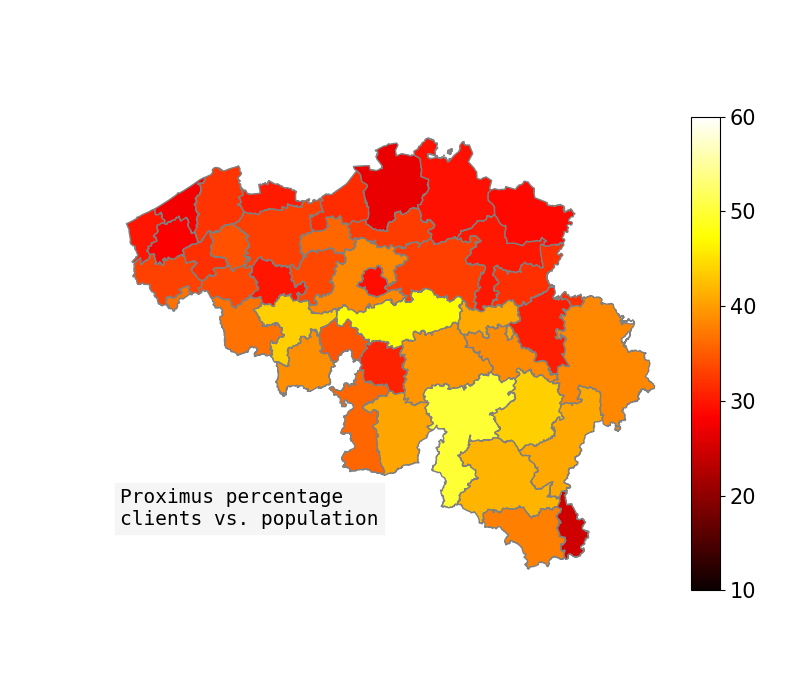

In [51]:
from mpl_toolkits.axes_grid1 import make_axes_locatable # for plot aesthetics
from matplotlib import colors

fig, ax = plt.subplots(figsize = (8,7)) # 1200 pixels x 1200 pixels
cax = make_axes_locatable(ax).append_axes("right", size="5%", pad=0.1) # Legend properties
ax.set_axis_off()

vmin=10
vmax=60
fig = arrondissements.plot(column='percentage', ax=ax, cmap='hot',
                            legend=True, edgecolor = 'gray', vmin=vmin, vmax=vmax, cax=cax)

textbox = 'Proximus percentage\nclients vs. population'
plt.figtext(.15, .25, textbox, backgroundcolor='whitesmoke', fontfamily='monospace', fontsize=14)
#     plt.close()

# (Create directory and) save figure
path = '../figures/maps/municipalities/time_series_tests/'
chart = fig.get_figure()
chart.savefig('Proximus-percentage-clients-vs-population.png',dpi=400, bbox_inches='tight')

In [50]:
arrondissements.percentage.min()

24.70449559608395